In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
plt.rcParams['figure.figsize'] = (12,8)

In [45]:
sns.set_style= ('whitegrid')

In [46]:
df = pd.read_csv('StudentsPerformance.csv')

# Checking out the data

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [48]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [49]:
df.rename(columns= {'race/ethnicity': 'race', 'parental level of education': 'par_edu', 'test preparation course': 'course', 
                        'math score': 'math', 'reading score': 'reading', 'writing score': 'writing'}, inplace=True)

# Feature engineering

In [50]:
df['overall'] = df['math'] + df['writing'] + df['reading']

### Final result: pass if passed in all subjects, else fail

In [51]:
def result(math, reading, writing):
    if math >= 40 and reading >= 40 and writing >= 40:
        final.append('pass')
    else:
        final.append('fail')

In [52]:
final= []

In [53]:
for x in range(len(df)):
    result(df['math'][x], df['reading'][x], df['writing'][x])

In [54]:
df['final'] = final

## Visualising the data and finding correlations with our target value (final)

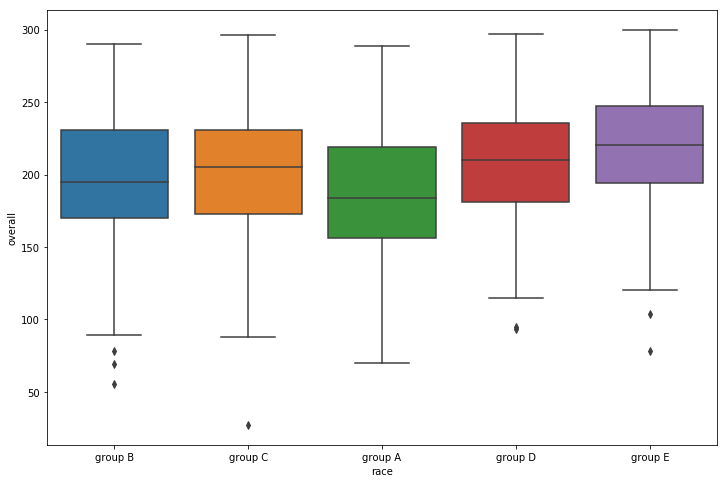

In [55]:
sns.boxplot(x='race', y='overall', data=df)

## Further checking out how it varies based on gender

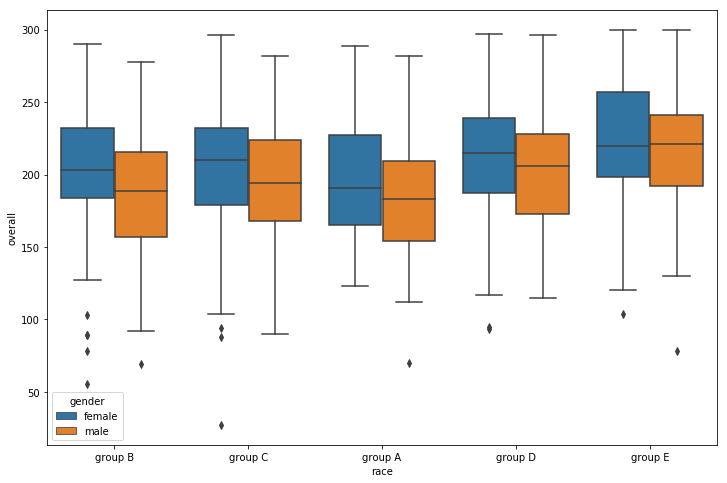

In [56]:
sns.boxplot(x='race', y='overall', data=df, hue='gender')

### Females in general are more educated across all race groups!

### Let's see how much having educated parents matter

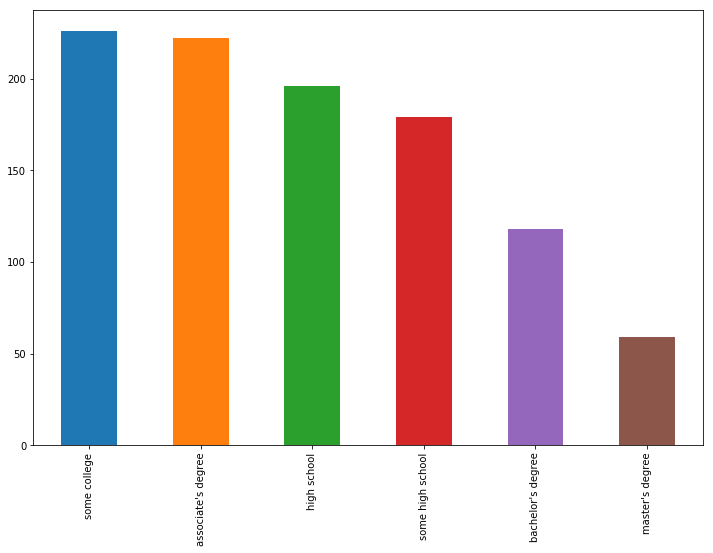

In [57]:
df['par_edu'].value_counts().plot.bar()

## Parental education has data which can be reduced and simplified due to closeness of some data points

In [58]:
dmap = {'some college': 'college', 'associate\'s degree': 'college', 'high school': 'school', 'some high school': 'school'}

In [59]:
df['par_edu'].replace(dmap, inplace=True)

In [60]:
df['par_edu'].value_counts()

college              448
school               375
bachelor's degree    118
master's degree       59
Name: par_edu, dtype: int64

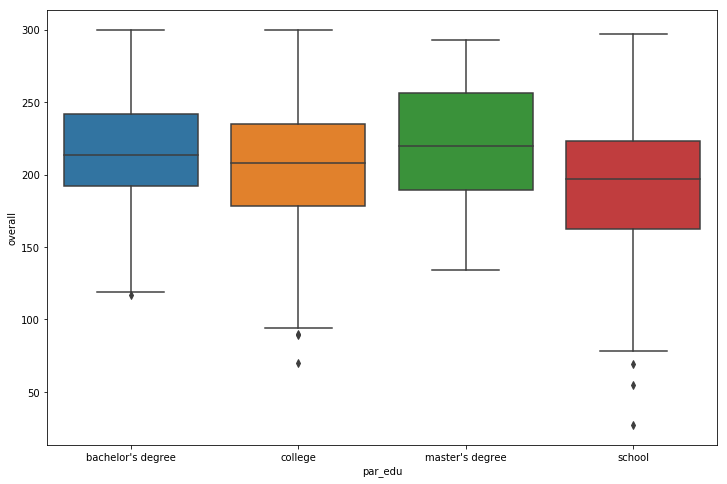

In [61]:
sns.boxplot(x = 'par_edu', y = 'overall', data = df)

## Checking out other features

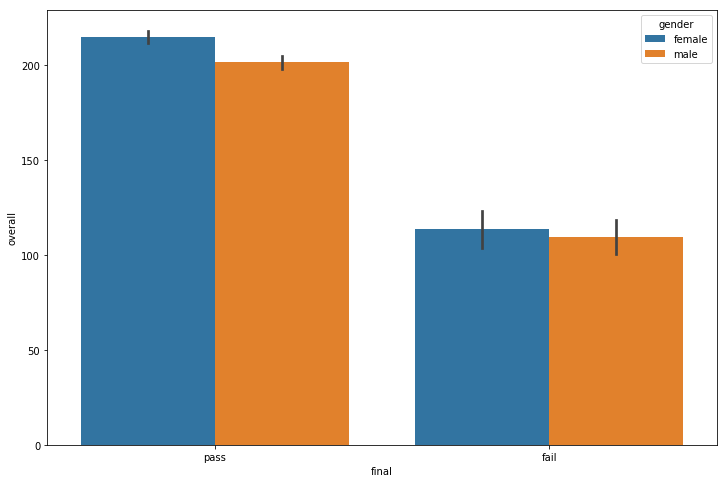

In [62]:
sns.barplot(y='overall', x='final', data=df, hue='gender')

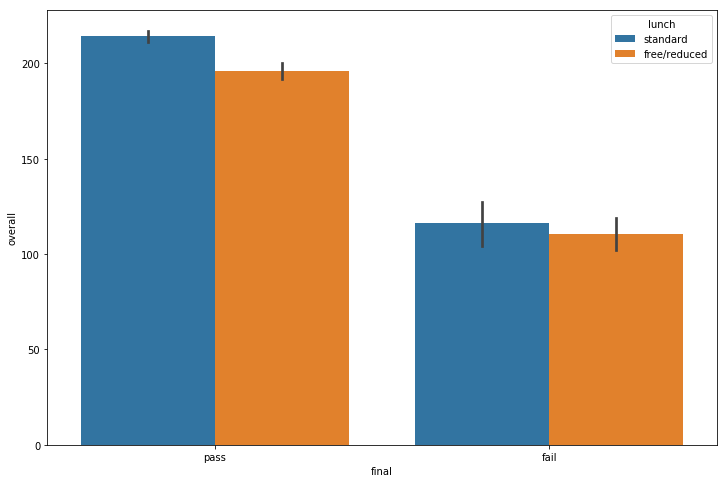

In [63]:
sns.barplot(y='overall', x='final', data=df, hue='lunch')

### Lunch and gender do seem like important features, so we can't ignore them

## Data preparation and machine learning modelling

In [64]:
X = pd.get_dummies(df.drop(['math', 'reading', 'writing', 'final'], axis=1))

In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
overall                      1000 non-null int64
gender_female                1000 non-null uint8
gender_male                  1000 non-null uint8
race_group A                 1000 non-null uint8
race_group B                 1000 non-null uint8
race_group C                 1000 non-null uint8
race_group D                 1000 non-null uint8
race_group E                 1000 non-null uint8
par_edu_bachelor's degree    1000 non-null uint8
par_edu_college              1000 non-null uint8
par_edu_master's degree      1000 non-null uint8
par_edu_school               1000 non-null uint8
lunch_free/reduced           1000 non-null uint8
lunch_standard               1000 non-null uint8
course_completed             1000 non-null uint8
course_none                  1000 non-null uint8
dtypes: int64(1), uint8(15)
memory usage: 22.5 KB


In [66]:
X.describe()

,overall,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,par_edu_bachelor's degree,par_edu_college,par_edu_master's degree,par_edu_school,lunch_free/reduced,lunch_standard,course_completed,course_none
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.312000,0.518000,0.482000,0.089000,0.190000,0.319000,0.262000,0.140000,0.11800,0.448000,0.059000,0.375000,0.355000,0.645000,0.358000,0.642000
std,42.771978,0.499926,0.499926,0.284886,0.392497,0.466322,0.439943,0.347161,0.32277,0.497537,0.235743,0.484365,0.478753,0.478753,0.479652,0.479652
min,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,205.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,233.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
y = df['final']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## We'll use K Nearest Neighbors for this problem

In [70]:
from sklearn.neighbors import KNeighborsClassifier

### First, we will try and find out an optimal value for K

In [71]:
error = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test) 
    error.append(np.mean(pred!=y_test))

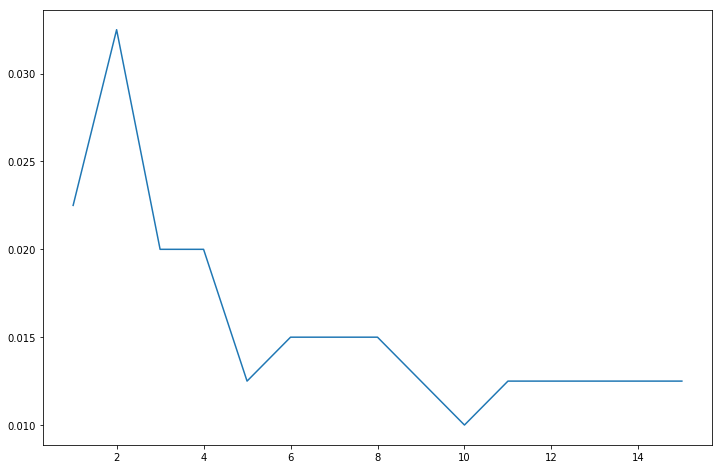

In [72]:
plt.plot(range(1,16), error)

### As we can see, error rate is lowest for K = 10. So we will go ahead with K = 10 and evaluate our model

In [73]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [74]:
y_test.replace(['pass', 'fail'], [1, 0], inplace=True)

In [75]:
pred = pred.tolist()
for index, element in enumerate(pred):
    if not (element=='fail'):
        pred[index] = 1
    else:
        pred[index] = 0

### We'll use a confusion matrix for evaluation

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix(y_test, pred)

array([[ 24,   4],
       [  0, 372]], dtype=int64)

### Precision = TRUE POSITIVES / (TRUE POSITIVES + FALSE POSITIVES)
### Recall = TRUE POSITIVES / (TRUE POSITIVES + FALSE NEGATIVES)

In [78]:
# precision
np.multiply(np.divide(24,28), 100)

85.71428571428571

In [79]:
# recall
np.multiply(np.divide(24,24), 100)

100.0